<a href="https://colab.research.google.com/github/WilliamAndreoli/estatistica_pratica_python/blob/main/Pratica_Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AMOSTRAGEM SIMPLES

In [1]:
# Amostragem simples
import pandas as pd
import numpy as np

In [2]:
# Carregando base de dados
base = pd.read_csv('iris.csv')
base

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Verificar quantas linhas e colunas existem na base, 150 linhas e 5 colunas
base.shape

(150, 5)

In [7]:
# Mudança da semente aleatória randômica para manter os resultados em várias execuções
np.random.seed(2345)
# 150 amostras, de 0 a 1, com reposição, probabilidades equivalentes
amostra = np.random.choice(a = [0,1], size = 150, replace=True,
                           p = [0.7,0.3])
# Verificar tamanho da amostra
len(amostra)

# Verificar tamanho da amostra para valores iguais a 1 e 0
len(amostra[amostra == 1])
len(amostra[amostra == 0])

101

In [8]:
base_final = base.loc[amostra == 0]
base_final

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica


AMOSTRAGEM SISTEMÁTICA

In [9]:
# Amostragem sistemática
import numpy as np
import pandas as pd
from math import ceil

In [21]:
# Criação das variáveis para representar a população, a amostra e o valor de k
populacao = 150
amostra = 15
k = ceil(populacao/amostra)
print(k)

10


In [22]:
# Definição de valor randômico para inicializar a amostra, iniciando em 1 até k + 1
r = np.random.randint(low = 1,high = k + 1, size=1)
print(r)

[2]


In [23]:
# Criamos um for para somar os próximos valores, baseado no primeiro valor r que foi definido
acumulador = r[0]
sorteados = []
for i in range(amostra):
    sorteados.append(acumulador)
    acumulador += k
print(sorteados)

[2, 12, 22, 32, 42, 52, 62, 72, 82, 92, 102, 112, 122, 132, 142]


In [24]:
len(sorteados)

15

In [25]:
# Carregamos a base de dados e criamos a base_final somente com valores sorteados
base = pd.read_csv('iris.csv')
base_final = base.loc[sorteados]
base_final

,sepal length,sepal width,petal length,petal width,class
2,4.7,3.2,1.3,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
62,6.0,2.2,4.0,1.0,Iris-versicolor
72,6.3,2.5,4.9,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor


AMOSTRAGEM ESTRATIFICADA

In [26]:
# Amostragem estratificada
# Importação das bibliotecas pandas e train_test_split para divisão da base de dados
import pandas as pd
from sklearn.model_selection import train_test_split

In [29]:
# Carregando a base de dados
iris = pd.read_csv('iris.csv')
iris['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [31]:
# iris.iloc[:, 0:4] buscamos somente os atributos previsores, ou seja, os dados sobre pétula e sétala da planta
# iris.iloc[:, 4] buscamos somente a classe, que é a espécie da planta (setosa, virginica ou sericolor)
# test_size selecionamos 50% da base de dados, que serão copiados para as variáveis X e Y.
# Essa função retorna 4 valores, porém, vamos usar somente os 50% da base de dados por isso
# colocamos "_" para outros valores
# stratify para retornar a amostra baseada na classe
x, _, y, _ = train_test_split(iris.iloc[:, 0:4], iris.iloc[:, 4],
                              test_size = 0.5, stratify = iris.iloc[:, 4])
y.value_counts()

class
Iris-versicolor    25
Iris-virginica     25
Iris-setosa        25
Name: count, dtype: int64

In [33]:
# Carregamento da base de dados e contagem de quantos registros por classe
infert = pd.read_csv('infert.csv')
infert

,Unnamed: 0,education,age,parity,induced,case,spontaneous,stratum,pooled.stratum
0,1,0-5yrs,26,6,1,1,2,1,3
1,2,0-5yrs,42,1,1,1,0,2,1
2,3,0-5yrs,39,6,2,1,0,3,4
3,4,0-5yrs,34,4,2,1,0,4,2
4,5,6-11yrs,35,3,1,1,1,5,32
...,...,...,...,...,...,...,...,...,...
243,244,12+ yrs,31,1,0,0,1,79,45
244,245,12+ yrs,34,1,0,0,0,80,47
245,246,12+ yrs,35,2,2,0,0,81,54
246,247,12+ yrs,29,1,0,0,1,82,43


In [34]:
infert['education'].value_counts()

education
6-11yrs    120
12+ yrs    116
0-5yrs      12
Name: count, dtype: int64

In [35]:
# Criando uma amostra com somente 40% dos registros (por isso é definido 0.6, pois é gerado o inverso)
x, _, y, _ = train_test_split(infert.iloc[:, 2:9], infert.iloc[:, 1],
                              test_size = 0.6, stratify = infert.iloc[:, 1])
y.value_counts()

education
6-11yrs    48
12+ yrs    46
0-5yrs      5
Name: count, dtype: int64

MEDIDAS DE CENTRALIDADE E VARIABILIDADE

In [36]:
# Medidas de centralidade e variabilidade
import numpy as np
from scipy import stats

In [37]:
# Criação da variável com os dados dos jogadores, visualização da mediana e média
jogadores = [40000, 18000, 12000, 250000, 30000, 140000, 300000, 40000, 800000]
np.mean(jogadores)

181111.11111111112

In [38]:
np.median(jogadores)

40000.0

In [39]:
# Criação de variáveis para geração dos quartis (0%, 25%, 50%, 75% e 100%)
quartis = np.quantile(jogadores, [0, 0.25, 0.5, 0.75, 1])
quartis

array([ 12000.,  30000.,  40000., 250000., 800000.])

In [41]:
# Visualização do desvio padrão
np.std(jogadores, ddof = 1)

255307.87514511007

In [42]:
# Visualização de estatísticas mais detalhadas usando a biblioteca scipy
stats.describe(jogadores)

DescribeResult(nobs=9, minmax=(12000, 800000), mean=181111.11111111112, variance=65182111111.11111, skewness=1.758635899846188, kurtosis=1.9572075427527729)

DISTRIBUIÇÃO NORMAL

In [43]:
# Distribuição normal
from scipy.stats import norm

In [44]:
# Conjunto de objetos em um cesto, a média é 8 e o desvio padrão é 2
# Qual a probabilidade de tirar um objeto que o peso é menor que 6 quilos?
norm.cdf(6, 6, 2)

0.5

In [46]:
# Qual a probabilidade de tirar um objeto que o peso é maior que 6 quilos?
norm.sf(6, 8, 2)
1 - norm.cdf(6, 8, 2)

0.8413447460685429

In [48]:
# Qual a probabilidade de tirar um objeto que o peso é menor que 6 ou maior que 10 quilos?
norm.cdf(6, 8, 2) + norm.sf(10, 8, 2)

0.31731050786291415

In [49]:
# Qual a probabilidade de tirar um objeto que o peso é menor que 10 e maior que 8 quilos?
norm.cdf(10, 8, 2) - norm.cdf(8, 8, 2)

0.3413447460685429

TESTES DE NORMALIDADE

In [50]:
# Testes distribuição normal
from scipy import stats
from scipy.stats import norm, skewnorm
import matplotlib.pyplot as plt

In [51]:
# Criação de uma variável com dados de uma distribuição normal com a função rvs (100 elementos)
dados = norm.rvs(size = 100)
dados

array([-7.90996947e-01,  9.47002627e-01,  5.39344555e-01, -4.73386044e-01,
       -2.90801509e-01,  8.30525379e-01,  1.72671951e+00,  1.10288687e+00,
       -1.01188431e+00,  6.42075429e-01, -4.50772159e-01, -1.41493469e+00,
        7.53084446e-01, -9.08550031e-01,  1.40106920e+00,  7.23251993e-01,
       -7.48438581e-02, -8.66629641e-01,  9.07347894e-01,  4.48333109e-01,
        6.28661893e-01,  1.48456955e+00, -6.38447363e-01, -1.11863123e+00,
       -1.60358653e-01, -2.05310307e+00, -1.25449839e+00,  6.80208423e-01,
       -8.39248209e-01,  4.08043258e-01, -1.65904955e-01,  3.17100930e-01,
       -3.41366093e-01,  1.88371188e+00, -7.85961814e-01,  4.13048650e-02,
        2.81461519e-01, -3.89599648e-01, -1.08444223e-01, -8.99040432e-01,
        2.72851876e-01,  3.06493518e-01,  1.07568539e-01,  1.06178284e+00,
        5.28442513e-02,  1.05973186e+00,  9.50550922e-03, -4.67923364e-01,
        1.40846288e+00,  1.31773208e+00,  4.14465504e-01, -4.19650075e-01,
        1.34111425e-01,  

Text(0.5, 1.0, 'Dados')

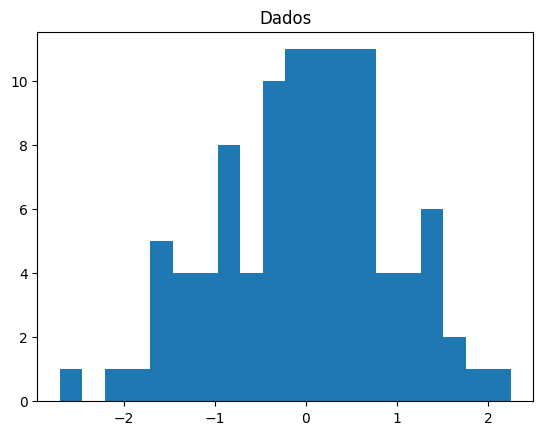

In [52]:
# Histograma
plt.hist(dados, bins=20)
plt.title('Dados')

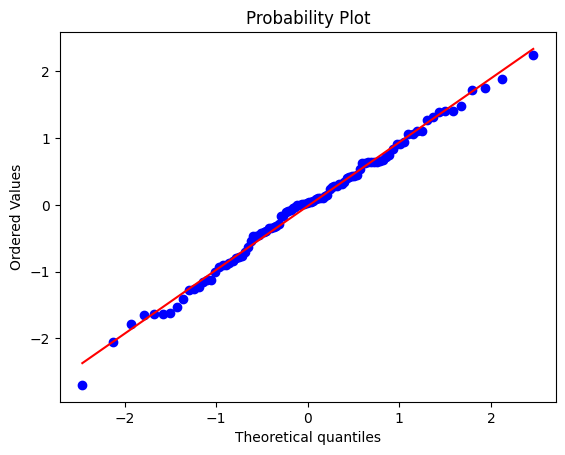

In [53]:
# Geração de gráfico para verificar se a distribuição é normal
fig, ax = plt.subplots()
stats.probplot(dados, fit = True, plot = ax)
plt.show()

In [54]:
# Execução do teste de Shapiro
# segundo argumento é o valor de p, não há como rejeitar a hipótese nula
stats.shapiro(dados)

ShapiroResult(statistic=0.99379962682724, pvalue=0.9312754273414612)

In [55]:
# Dados não normais
dados2 = skewnorm.rvs(a = 4, size = 10000)
dados2

array([2.07929464, 0.34499597, 0.29421367, ..., 0.21069302, 2.24742832,
       0.34182612])

Text(0.5, 1.0, 'Dados')

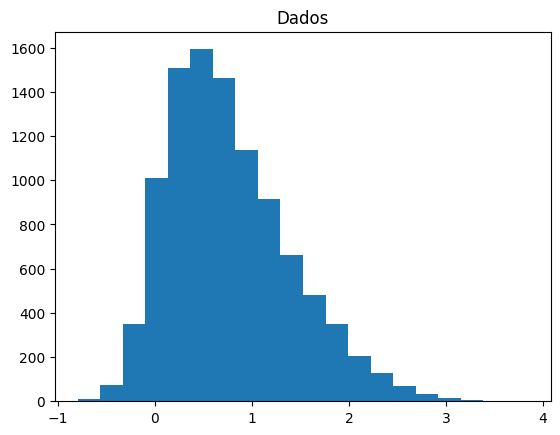

In [56]:
# Histograma
plt.hist(dados2, bins=20)
plt.title('Dados')

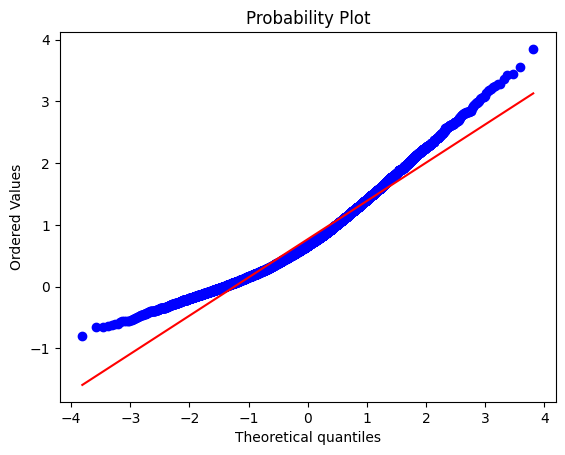

In [57]:
# Geração de gráfico para verificar se a distribuição é normal
fig, ax = plt.subplots()
stats.probplot(dados2, fit = True, plot = ax)
plt.show()

In [58]:
stats.shapiro(dados2)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9639897346496582, pvalue=3.5032461608120427e-44)